### 18) Problems and exercises
1. Consider a function $H_2(x, y):=\exp (8 x-13 y+21)+\exp (21 y-13 x-34)+0.0001 \exp (x+y)$. Is it convex/strictly convex? Minimize it, i.e., find $\left(x_*, y_*\right)=\arg \min _{(x, y)} H_2(x, y)$.
2. Minimize a function $J_2(x, y):=3 x y-2 y+1000\left(x^2+y^2-1.1\right) \exp \left(10\left(x^2+y^2-1\right)\right)$.
3. Consider a 99 -dimensional vector $x$ with components $x_1, x_2, \ldots, x_{99}$. For convenience, the dummy components $x_0=-1$ and $x_{100}=1$ are introduced, but $x_0$ and $x_{100}$ are not variables in the
11
optimization problem below. Minimize a function
$$
E_{99}(\boldsymbol{x}):=\frac{1}{2} \sum_{i=0}^{99}\left(x_{i+1}-x_i\right)^2+\frac{1}{16} \sum_{i=1}^{99}\left(1-x_i^2\right)^2, \quad \boldsymbol{x}_*=\underset{\boldsymbol{x}}{\arg \min } E_{99}(\boldsymbol{x})
$$
Find $E_{99}\left(\boldsymbol{x}_*\right)$. Plot the vector $\boldsymbol{x}_*$ (how the component $x_{* i}, 0 \leq i \leq 100$, changes with $i$ ).
4. A howitzer is positioned at $(x, y)=(0,0)$ and can shoot projectiles with initial speed 10 and any shooting angle $\theta$. The equations of projectile motion are $$ \frac{\mathrm{d}}{\mathrm{d} t}\left[\begin{array}{l}x \\ y\end{array}\right]=\left[\begin{array}{l}u \\ v\end{array}\right], \quad \frac{\mathrm{d}}{\mathrm{d} t}\left[\begin{array}{l}u \\ v\end{array}\right]=\left[\begin{array}{r}0 \\ -1\end{array}\right]-\sqrt{u^2+v^2}\left[\begin{array}{l}u \\ v\end{array}\right], \quad\left[\begin{array}{l}x(0) \\ y(0) \\ u(0) \\ v(0)\end{array}\right]=\left[\begin{array}{c}0 \\ 0 \\ 10 \cos \theta \\ 10 \sin \theta\end{array}\right] $$ ind the howitzer's maximal firing range, i.e., maximize $f_2(\theta)=x(T)$, where $T>0$ and $y(T)=0$.

In [1]:
#importing all the necessary packages
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
from numpy.linalg import inv

#### Newton-Raphon Method
Pure newton method
$$
\boldsymbol{x} \longmapsto \boldsymbol{x}-\left(\nabla^2 f\right)^{-1} \nabla f
$$


In [2]:
def pure_newton(f, df, Hf, x0, a=0.3, b=.9, st=10000):
    """
    Pure newton Method for finding optimium values
    """
    t=1; alpha=a; beta=b
    x=x0; x_tab=np.copy(x)
    F=f; dF=df; HF=Hf
    stop=st; counter=0
    # Stoping criterial
    while (((LA.norm(df(x)))>= 1e-8) and counter < stop):
        # Picking direction: gradient descent
        dx = -np.linalg.solve(HF(x),dF(x))   #(np.matmul((inv(HF(x))),dF(x)))
        # Update x
        x = x + dx
        x_tab = np.vstack((x_tab,x))
        counter +=1
    print("x_min =",x,"\t", "f(x_min) =",F(x),"\t no_iter =",counter)
    return x, x_tab

In order to improve the realiability of the pure Newton method, ...\
Damped Newton method: $\boldsymbol{x} \longmapsto \boldsymbol{x}-t\left(\nabla^2 f\right)^{-1} \nabla f$, where $t$ is obtained from line search.

In [3]:
def damped_newton(f, df, Hf, x0, a=0.25, b=0.5, st=10000):
    """
    Damped newton method for finding optimum values
    """
    t=1; alpha=a; beta=b
    x=x0; x_tab=np.copy(x)
    F=f; dF=df; HF=Hf
    stop=st; counter2=0
    # Stoping criterial
    while (((LA.norm(df(x)))>= 1e-8) and counter2 < stop):
        # Picking direction: gradient descent
        dx = -np.linalg.solve(HF(x),dF(x))   #(np.matmul((inv(HF(x))),dF(x)))
        # Line search : backtracking
        while F(x+t*dx)>= (F(x)+alpha*t*np.dot(dF(x),dx)):
            t =t*beta
        # Update x
        x = x + t*dx
        x_tab = np.vstack((x_tab,x))
        counter2 +=1
    print("x_min =",x,"\t", "f(x_min) =",F(x),"\t no_iter =",counter2)
    return x, x_tab

#### BGFS Algorithm
Algorithm BFGS (Broyden-Fletcher-Goldfarb-Shanno algorithm): Quasi-Newton algorithm with low rank updates of the Hessian approximation at each step.\
\
start with $k=0$, some initial guess $\boldsymbol{x}_0$ and $\hat{C}_0$ (e.g., $\left.\hat{C}_0=\hat{I}\right)$\
while $\left(\left\|\nabla f\left(\boldsymbol{x}_k\right)\right\|>\varepsilon\right)$ do\
$\quad$ pick direction $\Delta \boldsymbol{x}_k:=-\hat{C}_k \nabla f\left(\boldsymbol{x}_k\right)$\
$\quad$line search: choose step size $t$\
$\quad \quad \quad \quad \quad $backtracking line search: start with some not too small $t$, then reduce $t$\
$\quad \quad \quad \quad \quad $(e.g., $t \leftarrow \beta t)$\ until $f\left(\boldsymbol{x}_k+t \Delta \boldsymbol{x}_k\right)<f\left(\boldsymbol{x}_k\right)+\alpha \nabla f\left(\boldsymbol{x}_k\right) \cdot\left(t \Delta \boldsymbol{x}_k\right), 0 \leq \alpha<1$\
$\quad$update: $\boldsymbol{x}_{k+1}:=\boldsymbol{x}_k+\left(\boldsymbol{d}_k:=t \Delta \boldsymbol{x}_k\right)$
$$
\begin{aligned}
& \boldsymbol{g}_k:=\nabla f\left(\boldsymbol{x}_{k+1}\right)-\nabla f\left(\boldsymbol{x}_k\right) \\
& \hat{C}_{k+1}:=\left(\hat{I}-\frac{\boldsymbol{d}_k \boldsymbol{g}_k^{\mathrm{T}}}{\boldsymbol{g}_k^{\mathrm{T}} \boldsymbol{d}_k}\right) \hat{C}_k\left(\hat{I}-\frac{\boldsymbol{g}_k \boldsymbol{d}_k^{\mathrm{T}}}{\boldsymbol{g}_k^{\mathrm{T}} \boldsymbol{d}_k}\right)+\frac{\boldsymbol{d}_k \boldsymbol{d}_k^{\mathrm{T}}}{\boldsymbol{g}_k^{\mathrm{T}} \boldsymbol{d}_k}
\end{aligned}
$$
$\quad$ $k \leftarrow k+1$\
$\text { return } \boldsymbol{x}_{\text {last }}$

In [4]:
def BGFS(f, df, x0, st=1000):
    x=x0; stop = st
    F = f(x); dF = df(x); counter = 0
    C = np.eye(len(x)); x_tab = np.copy(x)
    x_old= np.array([100,100])
    while (LA.norm(dF)>1e-15) and counter < stop:
        d = -np.matmul(C,dF)
        while (f(x+d)>=F):
            d=d/2
            if (LA.norm(d)<1.11e-16):
                C = np.eye(len(x))
                d = -dF
        x_old = x
        x = x+d; F=f(x); x_tab = np.vstack((x_tab,x))
        counter += 1
        new_dF = df(x); g = new_dF - dF; dF = new_dF
        rho = 1/(np.matmul(g.T,d))
        temp = np.matmul(np.matmul(g.T,C),g)
        mu = rho*(1+rho*temp)
        C = C - rho*(np.matmul(d,np.matmul(g.T,C))+np.matmul(np.matmul(C,g),d.T)) + mu*(np.matmul(d,d.T))
    print("x_min =",x,"\t", "f(x_min) =",F,"\t no_iter =",counter)
    return x, x_tab

#### 18.1(a)

In [5]:
##### Function definition
def H(X):
	x = X[0]
	y = X[1]
	fac1 = np.exp(8*x - 13*y + 21)
	fac2 = np.exp(21*y - 13*x - 34)
	fac3 = 0.0001*np.exp(x+y)
	func = fac1 + fac2 + fac3
	return func

def dH(X):
    x = X[0]
    y = X[1]
    fac1 = np.exp(8*x - 13*y + 21)
    fac2 = np.exp(21*y - 13*x - 34)
    fac3 = 0.0001*np.exp(x+y)
    g_func = np.array([8*fac1-13*fac2+fac3, -13*fac1+21*fac2+fac3])
    return g_func

def d2H(X):
    x = X[0]
    y = X[1]
    fac1 = np.exp(8*x - 13*y + 21)
    fac2 = np.exp(21*y - 13*x - 34)
    fac3 = 0.0001*np.exp(x+y)
    H_func = np.array([[64*fac1+169*fac2+fac3, -104*fac1-273*fac2+fac3],\
                       [-104*fac1-273*fac2+fac3, 169*fac1+441*fac2+fac3]])
    return H_func
    

In [6]:
# Using pure Newton method
x0      = np.array( (1.0,1.2 ) )
x, x_tab=pure_newton(f=H, df=dH, Hf=d2H, x0=x0)

x_min = [2.57144729 3.1917222 ] 	 f(x_min) = 1.7827922385651283 	 no_iter = 18


In [7]:
# Using damped Newton method
x0      = np.array( (1.0,1.2) )
x_damped, x_tab_damped = damped_newton(f=H, df=dH, Hf=d2H, x0=x0, a=0.2, b=0.5)

x_min = [2.57144729 3.1917222 ] 	 f(x_min) = 1.7827922385651283 	 no_iter = 18


**Result:** At point $(2.57144729, 3.1917222)$ the function achieves its minuimum value of $1.7827922385651283$ with 18 steps using both Newton method.

#### 18.1(b)
By the virtue of the theorem which says:\
 \"Let function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ has smooth gradient. Then $f$ is convex iff
$$
\forall x: \quad \nabla^2 f(x) \succeq 0,
$$
that is the Hessian of the function is a positive semi-definite matrix at any point. (Remind that real symmetric $n \times n$ matrix $H$ is positive semi-definite iff $x^T H x \geq 0$ for any $x \in \mathbb{R}^n$.) Which is actually true for the given function when computed. Hence, $H_2(x,y)$ is convex function.

#### 18.2)

In [8]:
# function and its gradient
def J2(X):
    x = X[0]
    y = X[1]
    fac1 = np.exp(10*(x**2+y**2-1))
    fac2 = x**2 +y**2-1.1
    func = 3*x*y - 2*y + 1000*fac2*fac1
    return func

def dJ2(X):
    x = X[0]
    y = X[1]
    fac1 = np.exp(10*(x**2+y**2-1))
    fac2 = x**2 +y**2-1.1
    func =np.array([3*y + 20000*x*fac2*fac1+ 2000*x*fac1, 3*x-2+20000*y*fac1*fac2+2000*y*fac1])
    return func

In [9]:
# Using BGFS Algorithm
x= np.array([-0.5,0.06])
x, x_tab = BGFS(f=J2, df=dJ2, x0=x)

/tmp/ipykernel_23514/3563778648.py:5: RuntimeWarning: overflow encountered in exp
  fac1 = np.exp(10*(x**2+y**2-1))
/tmp/ipykernel_23514/3563778648.py:7: RuntimeWarning: overflow encountered in double_scalars
  func = 3*x*y - 2*y + 1000*fac2*fac1


x_min = [-0.55989649  0.82869624] 	 f(x_min) = -103.04909907065492 	 no_iter = 1000


**Result:** At point $(-0.55989649, 0.82869624)$ the function achieves its minuimum value of $-103.04909907065492$ with 1000 steps using BGFS algorithms. We observed that the loop seems not terminating by the norm threshold but by the set number of iteration.

### 18.3
Given
$$
\begin{aligned}
E_{99}(\bar{x}) & :=\frac{1}{2} \sum_{i=0}^{99}\left(x_{i+1}-x_i\right)^2+\frac{1}{16} \sum_{i=1}^{99}\left(1-x_i^2\right)^2, \text{ find } x_* =\underset{x}{\arg \min E_{99}(x)}
\end{aligned}
$$
Then the grad of x_j is
$$
\begin{aligned}
\partial_{x_j} E_{99}(x) & =\partial_{x_j}\left(\frac{1}{2}\left(x_j-x_{j-1}\right)^2\right)+\partial_{x_j}\left(\frac{1}{2}\left(x_{j+1}-x_j\right)^2 +\frac{1}{16}\left(1-x_j^2\right)^2\right) \\
& =-\left(x_{j+1}-2 x_j+x_{j-1}\right)-\frac{1}{4} x_j\left(1-x_j^2\right)
\end{aligned}
$$

In [10]:
# function and its gardient
def E99(X):
    x = X; N = len(x)
    F = 0.5*(x[1]-x[0])**2
    for i in range(1, N-1):
        F += 0.5*(x[i+1]-x[i])**2 + (1/16)*(1-(x[i])**2)**2
    return F

def dE99(X):
    x = X
    n = len(x)
    jac = np.array([-(x[j+1]-2*x[j]+x[j-1])-(1/4)*x[j]*(1-(x[j])**2) for j in range(1,n-1)])
    return jac


In [11]:
# We need to change a parameter(x) range here in order to accommodates the given function
def BGFS2(f, df, x0, st=1000):
    x=x0; stop = st
    x2 = x[1:-1]
    #print(len(x2))
    F = f(x2); dF = df(x); counter = 0
    C = np.eye(len(x2)); x_tab = np.copy(x2)
    x_old= np.array([100,100])
    while (LA.norm(dF)>1e-15) and counter < stop:
        d = -np.matmul(C,dF)
        while (f(x2+d)>=F):
            d=d/2
            if (LA.norm(d)<1.11e-16):
                C = np.eye(len(x2))
                d = -dF
        x_old = x2
        x2 = x2+d; x = np.append(np.insert(x2,0,-1),1); F=f(x2); x_tab = np.vstack((x_tab,x2))
        counter += 1
        new_dF = df(x); g = new_dF - dF; dF = new_dF
        rho = 1/(np.matmul(g.T,d))
        temp = np.matmul(np.matmul(g.T,C),g)
        mu = rho*(1+rho*temp)
        C = C - rho*(np.matmul(d,np.matmul(g.T,C))+np.matmul(np.matmul(C,g),d.T)) + mu*(np.matmul(d,d.T))
    print("x_min =",x,"\n\n", "f(x_min) =",F,"\t no_iter =",counter)
    return x2, x_tab

In [12]:
# Using BGFS Algorithm
x = np.linspace(-1,1,101)
x, x_tab = BGFS2(f=E99, df=dE99, x0=x, st=300)

x_min = [-1.         -0.99999982 -1.00000037 -0.9999995  -1.00000066 -0.99999924
 -1.00000088 -0.99999907 -1.00000098 -0.99999903 -1.00000097 -0.99999908
 -1.00000089 -0.99999919 -1.00000075 -0.99999935 -1.00000059 -0.99999951
 -1.00000043 -0.99999966 -1.00000029 -0.99999977 -1.00000018 -0.99999985
 -1.00000008 -0.99999986 -0.99999993 -0.9999997  -0.9999995  -0.99999892
 -0.99999788 -0.99999573 -0.99999149 -0.99998297 -0.99996597 -0.99993196
 -0.99986396 -0.999728   -0.99945614 -0.99891267 -0.99782653 -0.99565737
 -0.99133128 -0.98272737 -0.96571012 -0.93242039 -0.86868991 -0.75167134
 -0.5529118  -0.25818353  0.09678733  0.42778834  0.67141507  0.82285769
  0.90787542  0.95300169  0.9762603   0.988069    0.99401896  0.99700547
  0.99850166  0.9992505   0.99962513  0.99981251  0.99990622  0.99995308
  0.99997652  0.99998825  0.99999411  0.99999705  0.99999852  0.99999925
  0.99999962  0.9999998   0.9999999   0.99999993  0.99999998  0.99999996
  1.          0.99999996  1.00000002  0.999

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


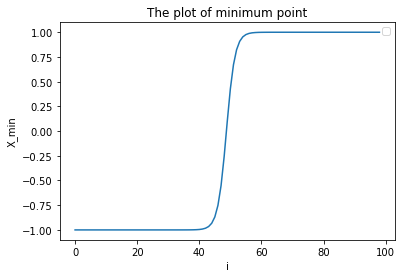

In [13]:
#The plot of x_minimum
plt.plot(x)
plt.title("The plot of minimum point")
plt.xlabel("i")
plt.ylabel(r"X_min")
plt.legend()

**Result:** At point x_min (as it appears in the above outcome), which appears as sigmoid function on the graph. Then, the function achieves its minuimum value of $0.4694066360341278$ with 300 steps using BGFS algorithms.

#### 18.4

In [14]:
def f2(x):
    u = x[2]; v = x[3]
    V = np.sqrt(u**2 + v**2)
    return np.array([u, v, -u * V, -v * V - 1.])

In [15]:
def F2(theta):
    theta = theta
    x = [0., 0., 10. * np.cos(theta), 10. * np.sin(theta)]
    h = 0.0001
    while (h > 1.e-20):
        k1 = h * f2(x)
        k2 = h * f2(x + 0.5 * k1)
        k3 = h * f2(x + 0.5 * k2)
        k4 = h * f2(x + k3)
        y = x + (k1 + 2. * k2 + 2. * k3 + k4) / 6.
        if (y[1] < 0.):
            h *= 0.5
        else:
            x = y
    return (x[0])

In [16]:
# pure Newton Method in one dimensional
def pure_Newton_Raphson(f, x0):
    delta = np.sqrt(np.finfo(float).eps)
    xold = x0
    x = xold
    xold = xold + 1.
    while (abs(x - xold) > 1e-8):
        xold = x
        fxold = -f(xold)
        x = xold
        x1 = x + delta
        x2 = x - delta
        x3 = x + 2*delta
        x4 = x - 2*delta
        dfdx = (f(x1) - fxold)/delta
        d2fdx2 = (f(x2) - 2*fxold+f(x1)) / delta**2
        #dfdx = (-f(x3) +16*f(x1) -30*fxold + 16*f(x2) -f(x4))/ (12*delta**2)
        x = xold + dfdx/d2fdx2
    return x, f(x)

In [17]:
pure_Newton_Raphson(F2, .5)

(0.5000000074505806, 2.887274282146324)

**Result:** From the above outcome we found maximum firing range to be $2.887274282146324$ at angle $\theta = 0.5000000074505806$